<a href="https://colab.research.google.com/github/pranjaljoshi22/college-seeker-master/blob/main/testrun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>






# Architechture Diagram



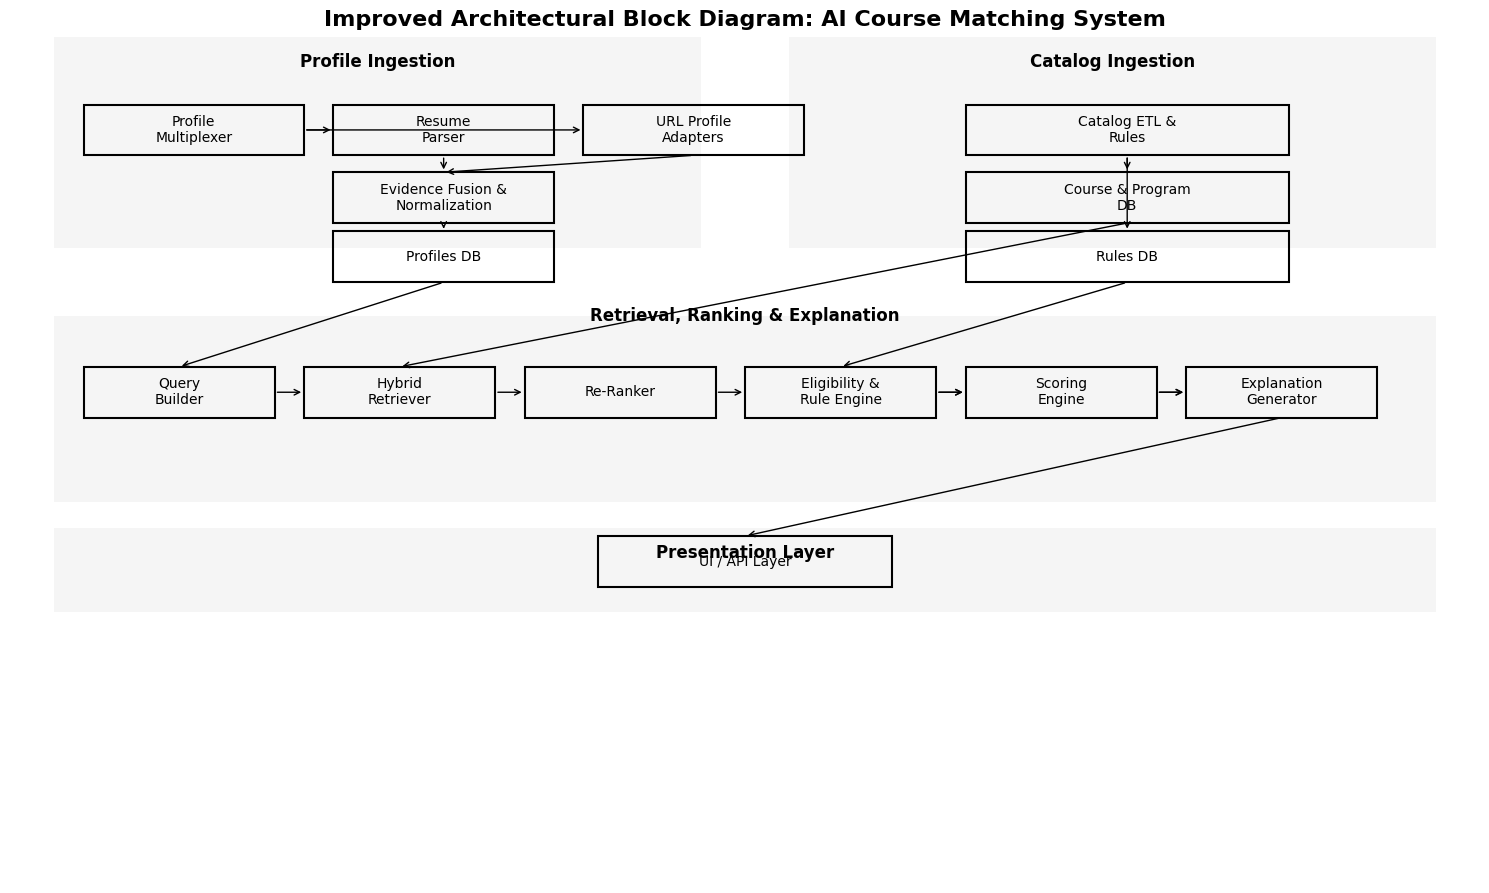

In [1]:
# @title
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyArrowPatch

fig, ax = plt.subplots(figsize=(15, 9))
ax.axis('off')

# Background groups
ax.add_patch(Rectangle((0.03, 0.75), 0.44, 0.25, facecolor='#f5f5f5', edgecolor='none'))
ax.text(0.25, 0.97, 'Profile Ingestion', ha='center', va='center', fontsize=12, weight='bold')

ax.add_patch(Rectangle((0.53, 0.75), 0.44, 0.25, facecolor='#f5f5f5', edgecolor='none'))
ax.text(0.75, 0.97, 'Catalog Ingestion', ha='center', va='center', fontsize=12, weight='bold')

ax.add_patch(Rectangle((0.03, 0.45), 0.94, 0.22, facecolor='#f5f5f5', edgecolor='none'))
ax.text(0.50, 0.67, 'Retrieval, Ranking & Explanation', ha='center', va='center', fontsize=12, weight='bold')

ax.add_patch(Rectangle((0.03, 0.32), 0.94, 0.10, facecolor='#f5f5f5', edgecolor='none'))
ax.text(0.50, 0.39, 'Presentation Layer', ha='center', va='center', fontsize=12, weight='bold')

# Utility functions
def draw_box(x, y, w, h, label, fontsize=10):
    rect = Rectangle((x, y), w, h, fill=False, edgecolor='black', linewidth=1.5)
    ax.add_patch(rect)
    ax.text(x + w/2, y + h/2, label, ha='center', va='center', fontsize=fontsize)
    return rect

def connect_boxes(box1, box2, direction='horizontal'):
    if direction == 'horizontal':
        x1 = box1.get_x() + box1.get_width()
        y1 = box1.get_y() + box1.get_height() / 2
        x2 = box2.get_x()
        y2 = box2.get_y() + box2.get_height() / 2
    else:  # vertical
        x1 = box1.get_x() + box1.get_width() / 2
        y1 = box1.get_y()
        x2 = box2.get_x() + box2.get_width() / 2
        y2 = box2.get_y() + box2.get_height()
    arr = FancyArrowPatch((x1, y1), (x2, y2), arrowstyle='->', mutation_scale=10, linewidth=1)
    ax.add_patch(arr)

# Profile ingestion boxes
pm = draw_box(0.05, 0.86, 0.15, 0.06, 'Profile\nMultiplexer')
res = draw_box(0.22, 0.86, 0.15, 0.06, 'Resume\nParser')
url = draw_box(0.39, 0.86, 0.15, 0.06, 'URL Profile\nAdapters')

norm = draw_box(0.22, 0.78, 0.15, 0.06, 'Evidence Fusion &\nNormalization')
prof_db = draw_box(0.22, 0.71, 0.15, 0.06, 'Profiles DB')

connect_boxes(pm, res)
connect_boxes(pm, url)
connect_boxes(res, norm, 'vertical')
connect_boxes(url, norm, 'vertical')
connect_boxes(norm, prof_db, 'vertical')

# Catalog ingestion boxes
cat_etl = draw_box(0.65, 0.86, 0.22, 0.06, 'Catalog ETL &\nRules')
course_db = draw_box(0.65, 0.78, 0.22, 0.06, 'Course & Program\nDB')
rules_db = draw_box(0.65, 0.71, 0.22, 0.06, 'Rules DB')

connect_boxes(cat_etl, course_db, 'vertical')
connect_boxes(cat_etl, rules_db, 'vertical')

# Retrieval & ranking boxes
x_positions = [0.05, 0.20, 0.35, 0.50, 0.65, 0.80]
labels = [
    'Query\nBuilder', 'Hybrid\nRetriever', 'Re‑Ranker',
    'Eligibility &\nRule Engine', 'Scoring\nEngine',
    'Explanation\nGenerator'
]
retrieval_boxes = [draw_box(x, 0.55, 0.13, 0.06, label) for x, label in zip(x_positions, labels)]

# Connect retrieval boxes horizontally
for b1, b2 in zip(retrieval_boxes, retrieval_boxes[1:]):
    connect_boxes(b1, b2)

# Connect DBs to retrieval pipeline
connect_boxes(prof_db, retrieval_boxes[0], 'vertical')
connect_boxes(course_db, retrieval_boxes[1], 'vertical')
connect_boxes(rules_db, retrieval_boxes[3], 'vertical')

# Connect from eligibility to scoring to explanation
connect_boxes(retrieval_boxes[3], retrieval_boxes[4])
connect_boxes(retrieval_boxes[4], retrieval_boxes[5])

# UI layer box
ui = draw_box(0.40, 0.35, 0.20, 0.06, 'UI / API Layer')
connect_boxes(retrieval_boxes[5], ui, 'vertical')

ax.text(0.5, 1.02, 'Improved Architectural Block Diagram: AI Course Matching System',
        ha='center', va='center', fontsize=16, weight='bold')

fig.tight_layout()
plt.show()


In [2]:
import os

print(os.cpu_count())

2


# Rough Implementation

In [3]:
!pip install langchain langchain-google-genai langchain-chroma langchain_huggingface pypdf langchain-community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 2.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 329.5/329.5 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.4/21.4 MB 104.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 83.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 89.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.9 MB/s eta 0:00:00
 

LLM Initialization

In [4]:
import getpass
import os

if not os.environ.get("GOOGLE_API_KEY"):
  os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter API key for Google Gemini: ")

from langchain.chat_models import init_chat_model

llm = init_chat_model("gemini-2.5-flash", model_provider="google_genai")

Enter API key for Google Gemini: ··········


Embedding Model Initialization

In [ ]:
import getpass
import os

from langchain_huggingface import HuggingFaceEmbeddings

embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

In [ ]:
from langchain_community.document_loaders import PyPDFLoader

# Replace 'path/to/your/document.pdf' with the actual path to your PDF file
loader = PyPDFLoader("/content/SOURAVDUTTA_AIDEV_7OCT.pdf")
documents = loader.load()



In [ ]:
print(len(documents[0].page_content))

In [ ]:
from langchain_chroma import Chroma

vector_store = Chroma(
    collection_name="example_collection",
    embedding_function=embeddings,
    persist_directory="./chroma_langchain_db_test1",  # Where to save data locally, remove if not necessary
)

In [ ]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,  # chunk size (characters)
    chunk_overlap=200,  # chunk overlap (characters)
    add_start_index=True,  # track index in original document
)
all_splits = text_splitter.split_documents(documents)


document_ids = vector_store.add_documents(documents=all_splits)

In [ ]:
course_vector_store = Chroma(
    collection_name="course_collection",
    embedding_function=embeddings,
    persist_directory="./chroma_langchain_db_courses1",  # Where to save data locally, remove if not necessary
)

In [ ]:
from langchain import hub

# N.B. for non-US LangSmith endpoints, you may need to specify
# api_url="https://api.smith.langchain.com" in hub.pull.
prompt = hub.pull("rlm/rag-prompt")

example_messages = prompt.invoke(
    {"context": "(context goes here)", "question": "(question goes here)"}
).to_messages()

assert len(example_messages) == 1
print(example_messages[0].content)

# User Flow Starts Here


## Student Data Ingestion

In [ ]:
from google.colab import files

uploaded = files.upload()

## Load and split the uploaded resume



In [ ]:
import io

uploaded_filename = list(uploaded.keys())[0]
with io.BytesIO(uploaded[uploaded_filename]) as pdf_file:
    # Create a dummy file path for PyPDFLoader
    temp_pdf_path = uploaded_filename
    with open(temp_pdf_path, 'wb') as f:
        f.write(pdf_file.read())

loader = PyPDFLoader(temp_pdf_path)
resume_documents = loader.load()

resume_splits = text_splitter.split_documents(resume_documents)

print(f"Number of chunks in resume: {len(resume_splits)}")

## Create a vector store for the resume

In [ ]:
from langchain_chroma import Chroma

resume_vector_store = Chroma(
    collection_name="resume_collection",
    embedding_function=embeddings,
    persist_directory="./chroma_langchain_db_resume1",
)

resume_document_ids = resume_vector_store.add_documents(documents=resume_splits)

print(f"Number of resume document chunks added to vector store: {len(resume_document_ids)}")

In [ ]:
course_loader=PyPDFLoader("/content/CSE-Brochure-2024.pdf")
course_documents = course_loader.load() # Use course_loader to load course documents

course_splits = text_splitter.split_documents(course_documents)

course_vector_store.add_documents(documents=course_splits)

## Implement similarity search

### Subtask:
Modify the retrieval function to perform a similarity search between the student's resume vector store and the course vector store.


In [ ]:
from typing import TypedDict, List

# Define a State type for the LangChain graph
class State(TypedDict):
    question: str
    context: List[str]
    answer: str

def retrieve(state: State, resume_vector_store: Chroma, course_vector_store: Chroma):
    """
    Retrieves relevant documents from both resume and course vector stores based on the question.
    """
    question = state["question"]

    # Perform similarity search on resume vector store
    retrieved_resume_docs = resume_vector_store.similarity_search(question)

    # Perform similarity search on course vector store
    retrieved_course_docs = course_vector_store.similarity_search(question)

    # Combine the retrieved documents
    combined_docs = retrieved_resume_docs + retrieved_course_docs

    return {"context": combined_docs}

## Integrate with the rag chain

### Subtask:
Update the RAG chain to use the results from the similarity search to answer questions or provide course recommendations based on the resume content.


**Reasoning**:
Import the necessary components for building the RAG chain, define the graph using the State and the previously defined retrieve and generate functions, compile the graph, invoke the compiled graph with a sample question, and print the output.



**Reasoning**:
The previous command failed because the `langgraph` library is not installed. Install the missing library.



In [ ]:
!pip install langgraph

In [ ]:
def generate(state: State):
    docs_content = "\n\n".join(doc.page_content for doc in state["context"])
    messages = prompt.invoke({"question": state["question"], "context": docs_content})
    response = llm.invoke(messages)
    return {"answer": response.content}

In [ ]:
from langgraph.graph import StateGraph, START

# Define the graph using StateGraph
graph_builder = StateGraph(State)

# Add nodes for retrieval and generation
graph_builder.add_node("retrieve", lambda state: retrieve(state, resume_vector_store, course_vector_store))
graph_builder.add_node("generate", generate)

# Add edges
graph_builder.add_edge(START, "retrieve")
graph_builder.add_edge("retrieve", "generate")

# Compile the graph
app = graph_builder.compile()

# Invoke the graph with a sample question
sample_question = "Which courses are being offered in IIT Hyderabad?"
result = app.invoke({"question": sample_question})

# Print the output
print(result["answer"])

In [ ]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
result
